# Loading dependencies

In [481]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

# Import imbalanced dataset

In [462]:
train_df = pd.read_csv("ML-A5-2022_train.csv")

Number of Tumor:  272
Number of Healthy :  728


C:\Users\Ineed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


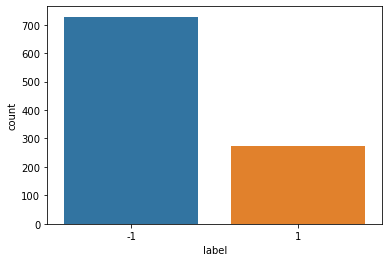

In [233]:
ax = sns.countplot(train_df.label,label="Count")
Healthy, Tumor = train_df.label.value_counts()
print('Number of Tumor: ',Tumor)
print('Number of Healthy : ',Healthy)
plt.savefig("test.svg")

# Preprocessing 

In [623]:
# -------- Preprocessing --------
train_df = pd.read_csv("ML-A5-2022_train.csv")
test_df = pd.read_csv("ML-A5-2022_test.csv")

# Preprocessing 

train_df.drop(labels = "Unnamed: 0", axis = 1, inplace = True)
test_df.drop(labels = "Unnamed: 0", axis = 1, inplace = True)

# Removing null values 
for i in train_df.columns[train_df.isnull().any(axis=0)] : 
    train_df[i].fillna(0, inplace=True)
    
for i in test_df.columns[test_df.isnull().any(axis=0)] : 
    test_df[i].fillna(0, inplace=True)
    
# Transforming categorical features 
df = train_df.replace(["low", "medium", "high"], [0, 1, 2])
test_df = test_df.replace(["low", "medium", "high"], [0, 1, 2])



# Removing columns of 0
lst = []
for i in df.columns : 
    if(np.count_nonzero(df[i]) == 0) :
        lst.append(i)
        
df.drop(labels = lst, axis = 1, inplace = True)
test_df.drop(labels = lst, axis = 1, inplace = True)


# Removing colums that do not provide additional informations for prediction
lst = []
for i in df.columns : 
    if(np.all(df[i] == df[i][0])) :
        lst.append(i)

df.drop(labels = lst, axis = 1, inplace = True)
test_df.drop(labels = lst, axis = 1, inplace = True)

# Removing features that have correlation (with another feature) greater than 0.8
# Since it requires too much times to do it on the whole dataset in once, subsets are
# built and dropping is performed

def corr_f(df) :
    lst = []
    sub = df.sample(n = 500, axis = 1)
    arr = np.where(sub.corr() >= 0.8)
    col = sub.columns
    for i in range(len(arr[0])) :
        if(arr[0][i] != arr[1][i]) :
            lst.append([col[arr[0][i]], col[arr[1][i]]])
            
    toDrop = []

    for i in lst :
        if(i[0] not in toDrop) :
            toDrop.append(i[0])
    print("# of elements to drop :", len(toDrop))
    x = df.drop(labels = toDrop, axis = 1)
    test_df.drop(labels = toDrop, axis = 1, inplace = True)
    
    return x


for i in range(1000) :
    df = corr_f(df)

# df.to_csv("dataset.csv")
# test_df.to_csv("test_dataset.csv")

# of elements to drop : 110
# of elements to drop : 118
# of elements to drop : 109
# of elements to drop : 99
# of elements to drop : 93
# of elements to drop : 93
# of elements to drop : 90
# of elements to drop : 89
# of elements to drop : 109
# of elements to drop : 104
# of elements to drop : 115
# of elements to drop : 101
# of elements to drop : 80
# of elements to drop : 94
# of elements to drop : 93
# of elements to drop : 90
# of elements to drop : 95
# of elements to drop : 89
# of elements to drop : 92
# of elements to drop : 91
# of elements to drop : 101
# of elements to drop : 78
# of elements to drop : 83
# of elements to drop : 72
# of elements to drop : 85
# of elements to drop : 85
# of elements to drop : 89
# of elements to drop : 86
# of elements to drop : 79
# of elements to drop : 66
# of elements to drop : 78
# of elements to drop : 81
# of elements to drop : 79
# of elements to drop : 71
# of elements to drop : 93
# of elements to drop : 71
# of elements to dro

# of elements to drop : 8
# of elements to drop : 8
# of elements to drop : 10
# of elements to drop : 12
# of elements to drop : 8
# of elements to drop : 4
# of elements to drop : 14
# of elements to drop : 4
# of elements to drop : 4
# of elements to drop : 10
# of elements to drop : 2
# of elements to drop : 2
# of elements to drop : 10
# of elements to drop : 6
# of elements to drop : 5
# of elements to drop : 12
# of elements to drop : 10
# of elements to drop : 17
# of elements to drop : 7
# of elements to drop : 7
# of elements to drop : 10
# of elements to drop : 8
# of elements to drop : 10
# of elements to drop : 8
# of elements to drop : 12
# of elements to drop : 2
# of elements to drop : 10
# of elements to drop : 8
# of elements to drop : 8
# of elements to drop : 6
# of elements to drop : 18
# of elements to drop : 12
# of elements to drop : 12
# of elements to drop : 11
# of elements to drop : 10
# of elements to drop : 6
# of elements to drop : 4
# of elements to drop

# of elements to drop : 6
# of elements to drop : 2
# of elements to drop : 2
# of elements to drop : 4
# of elements to drop : 2
# of elements to drop : 2
# of elements to drop : 2
# of elements to drop : 2
# of elements to drop : 2
# of elements to drop : 2
# of elements to drop : 0
# of elements to drop : 6
# of elements to drop : 2
# of elements to drop : 0
# of elements to drop : 0
# of elements to drop : 0
# of elements to drop : 6
# of elements to drop : 0
# of elements to drop : 4
# of elements to drop : 0
# of elements to drop : 2
# of elements to drop : 0
# of elements to drop : 2
# of elements to drop : 4
# of elements to drop : 2
# of elements to drop : 0
# of elements to drop : 2
# of elements to drop : 4
# of elements to drop : 2
# of elements to drop : 4
# of elements to drop : 6
# of elements to drop : 2
# of elements to drop : 2
# of elements to drop : 2
# of elements to drop : 6
# of elements to drop : 2
# of elements to drop : 2
# of elements to drop : 0
# of element

# of elements to drop : 2
# of elements to drop : 4
# of elements to drop : 2
# of elements to drop : 0
# of elements to drop : 0
# of elements to drop : 0
# of elements to drop : 0
# of elements to drop : 2
# of elements to drop : 2
# of elements to drop : 0
# of elements to drop : 0
# of elements to drop : 4
# of elements to drop : 0
# of elements to drop : 0
# of elements to drop : 0
# of elements to drop : 2
# of elements to drop : 0
# of elements to drop : 2
# of elements to drop : 2
# of elements to drop : 0
# of elements to drop : 0
# of elements to drop : 0
# of elements to drop : 0
# of elements to drop : 0
# of elements to drop : 0
# of elements to drop : 0
# of elements to drop : 2
# of elements to drop : 0
# of elements to drop : 4
# of elements to drop : 0
# of elements to drop : 0
# of elements to drop : 0
# of elements to drop : 2
# of elements to drop : 0
# of elements to drop : 0
# of elements to drop : 4
# of elements to drop : 2
# of elements to drop : 0
# of element

# Estimating BCR 

In [612]:
df = pd.read_csv("dataset.csv")

In [613]:
# Normalization
for i in df.columns :
    if(i == "label") : continue
    df[i] = np.abs(df[i])
    df[i] /= np.max(df[i])

## 1. Classifier selection

In [615]:
df_s = df.sample(frac = 1, random_state = 42)
df_train = df_s.iloc[:700, :]
df_test = df_s.iloc[700:, :]

In [616]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

In [617]:
evaluate = []
models = [type(j) for j in classifiers]

for i in range(len(models)) :
    clf = classifiers[i]
    clf.fit(df_train.drop(labels = "label",axis = 1), df_train.label)
    BCR = balanced_accuracy_score(df_test.label, clf.predict(df_test.drop(labels = "label", axis = 1)))
    evaluate.append(BCR)

c_bcr = pd.DataFrame({'Model' : models, 'BCR' : evaluate})
c_bcr.sort_values(by='BCR', ascending=False)

C:\Users\Ineed\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,Model,BCR
4,<class 'sklearn.ensemble._weight_boosting.AdaB...,0.739147
5,<class 'sklearn.ensemble._gb.GradientBoostingC...,0.718729
9,<class 'sklearn.linear_model._logistic.Logisti...,0.692772
2,<class 'sklearn.tree._classes.DecisionTreeClas...,0.674256
3,<class 'sklearn.ensemble._forest.RandomForestC...,0.568584
1,<class 'sklearn.svm._classes.SVC'>,0.536585
6,<class 'sklearn.naive_bayes.GaussianNB'>,0.516503
0,<class 'sklearn.neighbors._classification.KNei...,0.512195
8,<class 'sklearn.discriminant_analysis.Quadrati...,0.496644
7,<class 'sklearn.discriminant_analysis.LinearDi...,0.465037


## 2. Classifier tuning

In [618]:
i = 0
x_test = df.drop(labels = "label", axis = 1)[i*100:(i+1)*100]
y_test = df.label[i*100:(i+1)*100]
x_train = df.drop(x_test.index).drop(labels = "label", axis = 1)
y_train = df.drop(x_test.index).label

clf = AdaBoostClassifier()
clf.fit(x_train, y_train)
cv_acc = balanced_accuracy_score(y_test, clf.predict(x_test))

In [619]:
def cross_acc(deg) : 
    cv_acc = 0.0

    for i in range(10) : 
        x_test = df_train.drop(labels = "label", axis = 1)[i*70:(i+1)*70]
        y_test = df_train.label[i*70:(i+1)*70]
        x_train = df_train.drop(x_test.index).drop(labels = "label", axis = 1)
        y_train = df_train.drop(x_test.index).label
        clf = AdaBoostClassifier(n_estimators = 50)
        clf.fit(x_train, y_train)
        cv_acc +=  balanced_accuracy_score(y_test, clf.predict(x_test))

    return cv_acc/10


acc_def = [cross_acc(i) for i in np.arange(1, 2, 1)]

print(acc_def)
print(np.array(acc_def).argmax())

0
1
2
3
4
5
6
7
8
9
[0.6859835912212059]
0


In [621]:
frame = pd.DataFrame(columns = ["indiv_test_acc", "CI_lower_bound", "CI_upper_bound", 
                                "mean_test_acc", "observed_lower_bound", "observed_upper_bound"])


clf = AdaBoostClassifier()

for i in range(10) : 
    train = pd.DataFrame.sample(df_train,frac=0.5, random_state = i)
    test = pd.DataFrame.sample(df_test,n = 100, random_state=i)


    
    clf.fit(train.drop(labels = "label",axis = 1), train.label)

    test_bcr = balanced_accuracy_score(test.label, clf.predict(test.drop(labels = "label", axis = 1)))


    n = test.shape[0]
    zn = 1.96
    x = zn * np.sqrt((test_bcr*(1-test_bcr))/n)
    
    
    test_bcrs = []

    for j in range(100) :
        test = pd.DataFrame.sample(df_test,n = 100, random_state=(i+1)*j)
        
        test_bcrs.append(balanced_accuracy_score(test.label, clf.predict(test.drop(labels = "label", axis = 1))))
        
    mean_test_bcr = sum(test_bcrs)/100
    print(mean_test_bcr)

    frame = frame.append(pd.DataFrame(data = np.array([[test_bcr, 
                                                        test_bcr-x, test_bcr+x, 
                                                        mean_test_bcr, np.quantile(test_bcrs, 0.025), 
                                                        np.quantile(test_bcrs, 0.975)]]), 
                                      columns= ["indiv_test_acc", "CI_lower_bound", 
                                                "CI_upper_bound", "mean_test_acc", 
                                                "observed_lower_bound", "observed_upper_bound"]), 
                         ignore_index = True)

0.6049415497229884
0.697293401204445
0.6439089795762317
0.6852302331832987
0.6584913076167085
0.6885304525768058
0.7051066588736435
0.6744736681932899
0.6182674767163963
0.668810716400716


In [622]:
frame

,indiv_test_acc,CI_lower_bound,CI_upper_bound,mean_test_acc,observed_lower_bound,observed_upper_bound
0,0.614035,0.518618,0.709452,0.604942,0.530204,0.671024
1,0.675676,0.583924,0.767428,0.697293,0.584559,0.780638
2,0.613902,0.518478,0.709325,0.643909,0.558066,0.739809
3,0.598855,0.502789,0.694920,0.685230,0.600142,0.774489
4,0.657895,0.564909,0.750880,0.658491,0.586644,0.735119
5,0.720954,0.633042,0.808866,0.688530,0.618595,0.768464
6,0.727183,0.639883,0.814482,0.705107,0.634683,0.791067
7,0.703947,0.614471,0.793424,0.674474,0.614662,0.745233
8,0.598214,0.502124,0.694305,0.618267,0.548546,0.688831
9,0.579655,0.482907,0.676403,0.668811,0.575677,0.757972


# Finding the best classifier

In [ ]:
df = pd.read_csv("dataset.csv")

In [ ]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

In [ ]:
evaluate = []
models = [type(j) for j in classifiers]


new_df = df.sample(frac = 1)
train = new_df.iloc[:400, :]
test = new_df.iloc[400:, :]

for i in range(len(models)) :
    clf = classifiers[i]
    clf.fit(train.drop(labels = "label", axis = 1), train.label)
    acc = accuracy_score(test.label, clf.predict(test.drop(labels = "label", axis = 1)))
    evaluate.append(acc)

c_acc = pd.DataFrame({'Model' : models, 'Accuracy' : evaluate})
c_acc.sort_values(by='Accuracy', ascending=False)

# Prediction

In [624]:
df = pd.read_csv("dataset.csv")
test_df = pd.read_csv("test_dataset.csv")

In [625]:
def balanced_dataset(data, X_test, Tumor = 272) :
# Create a balanced dataset
    df = data.sample(frac=1)
    test_df = X_test.sample(frac = 1)
    tumor_df = df.loc[df.label == 1] 
    healthy_df = df.loc[df.label == -1][:Tumor]
    df = pd.concat([tumor_df, healthy_df])
    df = df.sample(frac=1)
    lst = []
    for i in df.columns : 
        if(np.count_nonzero(df[i]) == 0) :
            lst.append(i)
    df.drop(labels = lst, axis = 1, inplace = True)
    test_df.drop(labels = lst, axis = 1, inplace = True)
    
    for i in df.columns :
        if(i == "label") : continue
        df[i] = np.abs(df[i])
        df[i] /= np.max(df[i])
    
    return df, test_df

In [626]:
def predict(data, X_test, nb_estimators = 21) :
    b = 1001
    string = "C-"
    lst = [string + str(b+i) for i in range(len(X_test))]
    dic = {"" : lst, "Prediction" : [0]*len(X_test)}
    
    for i in range(nb_estimators) :
        clf = DecisionTreeClassifier(max_depth = 1)
        df, df_test = balanced_dataset(data, X_test)
        df_train, df_val = df.iloc[:400, :], df.iloc[400:, :]
        X_train, y_train = df_train.drop(labels = "label", axis = 1), df_train.label
        X_val, y_val = df_val.drop(labels = "label", axis = 1), df_val.label
        clf.fit(X_train, y_train)
        print(i, accuracy_score(y_val, clf.predict(X_val)))
        dic["Prediction"] += clf.predict(df_test)
    
    pred_df = pd.DataFrame.from_dict(dic)
    pred_df["Prediction"] = pred_df.drop(labels = "", axis = 1).applymap(lambda x : 1 if x > 0 else -1)
    
    return pred_df

In [627]:
pred = predict(df, test_df)

0 0.6875
1 0.7083333333333334
2 0.7083333333333334
3 0.6458333333333334
4 0.7361111111111112
5 0.6597222222222222
6 0.6736111111111112
7 0.7291666666666666
8 0.6666666666666666
9 0.6666666666666666
10 0.6458333333333334
11 0.625
12 0.6458333333333334
13 0.6944444444444444
14 0.6597222222222222
15 0.7361111111111112
16 0.7152777777777778
17 0.6597222222222222
18 0.6458333333333334
19 0.6875
20 0.6111111111111112


In [628]:
pred["Prediction"].values

array([-1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1,
        1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1,
        1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1,
        1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1,
       -1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,
        1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,
        1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,
       -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1,
        1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1,
       -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,
        1, -1, -1, -1,  1

Number of Tumor:  150
Number of Healthy :  350


C:\Users\Ineed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


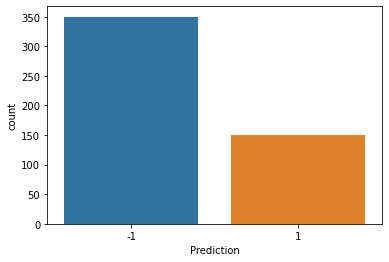

In [631]:
ax = sns.countplot(pred.Prediction,label="Count")
Healthy, Tumor = pred.Prediction.value_counts()
print('Number of Tumor: ',Tumor)
print('Number of Healthy : ',Healthy)
plt.savefig("pred.svg")

In [630]:
pred.to_csv("prediction.csv")